In [1]:
import numpy as np
import pandas as pd

In [2]:
x_train= pd.read_csv('data_reviews/x_train.csv')
y_train= pd.read_csv('data_reviews/y_train.csv')

In [3]:
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

In [4]:
import math

In [5]:
import re
import nltk

In [6]:
#lower case
x_train['text_processed'] = x_train['text'].map(lambda x: x.lower())

# contractions
def contractions(s):
    s = re.sub(r"won’t", "will not",s)
    s = re.sub(r"would’t","would not",s)
    s = re.sub(r"could’t", "could not",s)
    s = re.sub(r"\'d", " would",s)
    s = re.sub(r"can\'t", "can not",s)
    s = re.sub(r"n\'t", " not", s)
    s = re.sub(r"\'re", " are", s)
    s = re.sub(r"\'s", " is", s)
    s = re.sub(r"\'ll", " will", s)
    s = re.sub(r"\'t", " not", s)
    s = re.sub(r"\'ve", " have", s)
    s = re.sub(r"\'m", " am", s)
    return s
x_train['text_processed'] = x_train['text_processed'].map(lambda x: contractions(x))

x_train['text_processed'] = x_train['text_processed'].map(lambda x: re.sub('[.!,\.?()0123456789:;\x85\x96\x97"#$%&()\[\]*+-/\']', '', x))

# remove non-alpha words
import nltk
x_train['text_processed'] = x_train['text_processed'].apply(lambda x: " ".join([re.sub('[^A-Za-z]+','',x) for x in nltk.word_tokenize(x)]))

# remove extra spaces
x_train['text_processed'] = x_train['text_processed'].apply(lambda x: re.sub(' +',' ', x))

In [7]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
x_train['1'] = x_train['text_processed'].apply(lambda x: " ".join([x for x in x.split() if x not in stop]))

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
x_train['1'] = x_train['1'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))
x_train['2'] = x_train['text_processed'].apply(lambda x: " ".join([lemmatizer.lemmatize(w) for w in nltk.word_tokenize(x)]))

In [11]:
# # count vectorizor, 'text processed'
import time

In [16]:
# countvectorize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

param_grid = {'mlp__hidden_layer_sizes':[(100,), (50,),(20,20),(50, 100)], 
              'mlp__solver': ['lbfgs'],
              'mlp__alpha': np.logspace(-4, 2, 6),
              'mlp__max_iter': [50]          
             }
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('mlp', MLPClassifier())
    ]
)

a = time.time()

grid = GridSearchCV(pipeline, param_grid, return_train_score = False, n_jobs = -1)
grid.fit(x_train['text_processed'], y_train.values.reshape(-1))
# print(grid.cv_results_)
# print(grid.best_params_)
# print(grid.best_score_)
print(time.time()-a)

160.5552372932434


C:\Users\Zhaohui Zhang\.conda\envs\ml135_env_sp21\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [18]:
print(grid.cv_results_)
print(grid.best_params_)
print(grid.best_score_)

{'mean_fit_time': array([ 6.31391816,  3.3847507 ,  1.6312356 ,  4.383077  ,  6.37355804,
        3.44598584,  1.67831116,  5.15122519, 10.06767955,  5.38719687,
        1.89532905,  5.99796267, 11.15337367,  5.6173799 ,  1.80417199,
        6.14775715, 11.02870927,  5.60540986,  1.80816445,  6.07435641,
        7.89229875,  4.27018061,  0.61295891,  1.52053423]), 'std_fit_time': array([0.44216759, 0.23945866, 0.3740161 , 0.22608529, 0.37770163,
       0.0963941 , 0.18765386, 0.55222259, 1.20071665, 0.25676726,
       0.27095656, 0.1319133 , 0.38553248, 0.23235317, 0.14255264,
       0.17423685, 0.31715506, 0.2619171 , 0.19092716, 0.2133066 ,
       1.04381301, 0.30615747, 0.09521894, 0.25333151]), 'mean_score_time': array([0.01914959, 0.01795263, 0.01655746, 0.02134323, 0.02014604,
       0.0197494 , 0.01655455, 0.01815138, 0.02014604, 0.01874738,
       0.01715355, 0.02054648, 0.02014794, 0.01875029, 0.01675696,
       0.01875215, 0.01954861, 0.0187531 , 0.01835337, 0.01954746,
     

In [19]:
param_grid = {'mlp__hidden_layer_sizes':[(100,), (50,),(200,), (300,)], 
              'mlp__solver': ['lbfgs'],
              'mlp__alpha': np.logspace(0,2,4),
              'mlp__max_iter': [50,100]          
             }
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('mlp', MLPClassifier())
    ]
)

a = time.time()

grid = GridSearchCV(pipeline, param_grid, return_train_score = False, n_jobs = -1)
grid.fit(x_train['text_processed'], y_train.values.reshape(-1))
# print(grid.cv_results_)
# print(grid.best_params_)
# print(grid.best_score_)
print(time.time()-a)

976.1293363571167


C:\Users\Zhaohui Zhang\.conda\envs\ml135_env_sp21\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [20]:
print(grid.cv_results_)
print(grid.best_params_)
print(grid.best_score_)

{'mean_fit_time': array([12.26241083, 21.74425659,  5.77715197, 10.18775506, 22.88839722,
       44.8889688 , 34.52588   , 67.20868683, 11.871456  , 22.27842879,
        5.80068789, 10.26156068, 22.75236115, 43.91237998, 34.4181663 ,
       67.29864964, 11.97438021, 22.12184615,  5.92276187,  9.37951822,
       23.0292202 , 43.9957572 , 35.28544846, 65.97019858,  8.48850203,
        8.97260728,  4.02324262,  4.20814629, 17.432585  , 16.35267339,
       27.51263185, 26.36629639]), 'std_fit_time': array([0.66878937, 0.67074975, 0.25807554, 0.75100099, 0.98829378,
       1.79710504, 2.34160691, 3.24715186, 0.69310802, 0.88208028,
       0.22143273, 0.76144768, 0.90045052, 1.50906393, 2.12709324,
       2.7286215 , 0.78644886, 0.79776827, 0.19263664, 1.68714757,
       0.94391479, 1.5955823 , 2.54844997, 3.12485893, 0.95893776,
       1.52374191, 0.3054503 , 0.48238407, 2.45486876, 1.59582495,
       2.14055043, 1.70994317]), 'mean_score_time': array([0.02074795, 0.02094703, 0.02034698, 0.

In [52]:
np.logspace(0.1,0.9,3)

array([1.25892541, 3.16227766, 7.94328235])

In [21]:
param_grid = {'mlp__hidden_layer_sizes':[(75,), (100,), (125,)], 
              'mlp__solver': ['lbfgs'],
              'mlp__alpha': np.logspace(0.1,0.9,3),
              'mlp__max_iter': [50, 30, 10]          
             }
pipeline = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('mlp', MLPClassifier())
    ]
)

a = time.time()

grid = GridSearchCV(pipeline, param_grid, return_train_score = False, n_jobs = -1)
grid.fit(x_train['text_processed'], y_train.values.reshape(-1))
print(grid.cv_results_)
print(grid.best_params_)
print(grid.best_score_)
print(time.time()-a)

{'mean_fit_time': array([ 8.32194791,  5.01139984,  2.11115189, 11.0861558 ,  6.82435102,
        2.84778371, 13.77297173,  8.70292745,  3.73620653,  8.06603122,
        5.01678472,  2.28329363, 11.09134083,  6.90433688,  2.86892719,
       13.74983459,  8.73264661,  3.76393242,  7.95911961,  4.99184899,
        2.12311997, 10.89785957,  6.87401528,  3.03687901, 13.88566957,
        8.78052187,  3.39212708]), 'std_fit_time': array([0.58065451, 0.48652275, 0.23118079, 0.77602815, 0.5544255 ,
       0.42324842, 0.62519981, 0.47846101, 0.25132897, 0.32699679,
       0.35309458, 0.29326275, 0.75229142, 0.50542722, 0.4399347 ,
       0.71642413, 0.59329359, 0.33585742, 0.34358607, 0.4060079 ,
       0.42914626, 0.47437204, 0.44646388, 0.15879711, 0.71772478,
       0.66392446, 0.60669366]), 'mean_score_time': array([0.01715407, 0.01775393, 0.01775169, 0.01835132, 0.01934915,
       0.01715474, 0.01974826, 0.01835313, 0.02054796, 0.02014618,
       0.01855478, 0.01615763, 0.02114553, 0.01795

C:\Users\Zhaohui Zhang\.conda\envs\ml135_env_sp21\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


{'mlp__alpha': 7.943282347242816, 'mlp__hidden_layer_sizes': (75,), 'mlp__max_iter': 50, 'mlp__solver': 'lbfgs'}

In [29]:
# max iter
param_grid1 = {'mlp__hidden_layer_sizes':[(75,)], 
              'mlp__solver': ['lbfgs'],
              'mlp__alpha': [7.943282347242816],
              'mlp__max_iter': np.logspace(1,2.5, 10)         
             }
pipeline1 = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('mlp', MLPClassifier())
    ]
)
grid1 = GridSearchCV(pipeline1, param_grid1, return_train_score = True, n_jobs = -1)
grid1.fit(x_train['text_processed'], y_train.values.reshape(-1))
print(grid1.best_params_)
print(grid1.best_score_)

{'mlp__alpha': 7.943282347242816, 'mlp__hidden_layer_sizes': (75,), 'mlp__max_iter': 68.12920690579611, 'mlp__solver': 'lbfgs'}
0.8104166666666668


C:\Users\Zhaohui Zhang\.conda\envs\ml135_env_sp21\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


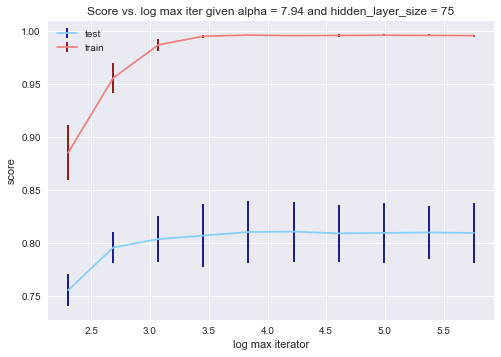

In [30]:
def log_iter(row):
    return math.log(row['param_mlp__max_iter'])
d1 = pd.DataFrame.from_dict(grid1.cv_results_).sort_values(by = ['param_mlp__max_iter'])
d1['log_iter'] = d1.apply(lambda row: log_iter(row), axis = 1)
plt.errorbar(d1['log_iter'],d1['mean_test_score'], d1['std_test_score'], ecolor = 'darkblue',color = 'lightskyblue', label = 'test')
plt.errorbar(d1['log_iter'],d1['mean_train_score'], d1['std_train_score'], ecolor = 'darkred', color = 'lightcoral', label = 'train')
plt.xlabel('log max iterator')
plt.ylabel('score')
plt.title('Score vs. log max iter given alpha = 7.94 and hidden_layer_size = 75')
plt.legend()

In [32]:
# alpha
param_grid2 = {'mlp__hidden_layer_sizes':[(75,)], 
              'mlp__solver': ['lbfgs'],
              'mlp__alpha': np.logspace(0, 1.2, 10),
              'mlp__max_iter': [50]        
             }
pipeline2 = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('mlp', MLPClassifier())
    ]
)
grid2 = GridSearchCV(pipeline2, param_grid2, return_train_score = True, n_jobs = -1)
grid2.fit(x_train['text_processed'], y_train.values.reshape(-1))
print(grid2.best_params_)
print(grid2.best_score_)

{'mlp__alpha': 11.659144011798316, 'mlp__hidden_layer_sizes': (75,), 'mlp__max_iter': 50, 'mlp__solver': 'lbfgs'}
0.8108333333333334


C:\Users\Zhaohui Zhang\.conda\envs\ml135_env_sp21\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


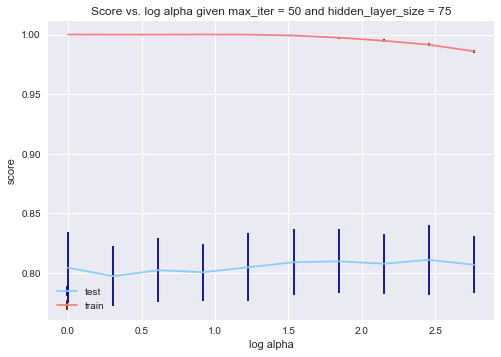

In [34]:
def log_alpha(row):
    return math.log(row['param_mlp__alpha'])
d2 = pd.DataFrame.from_dict(grid2.cv_results_).sort_values(by = ['param_mlp__alpha'])
d2['log_alpha'] = d2.apply(lambda row: log_alpha(row), axis = 1)
plt.errorbar(d2['log_alpha'],d2['mean_test_score'], d2['std_test_score'], ecolor = 'darkblue',color = 'lightskyblue', label = 'test')
plt.errorbar(d2['log_alpha'],d2['mean_train_score'], d2['std_train_score'], ecolor = 'darkred', color = 'lightcoral', label = 'train')
plt.xlabel('log alpha')
plt.ylabel('score')
plt.title('Score vs. log alpha given max_iter = 50 and hidden_layer_size = 75')
plt.legend()

In [35]:
# layer size
param_grid3 = {'mlp__hidden_layer_sizes':[(10*(x+1),) for x in range(10)], 
              'mlp__solver': ['lbfgs'],
              'mlp__alpha': [7.943282347242816],
              'mlp__max_iter': [50]        
             }
pipeline3 = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('mlp', MLPClassifier())
    ]
)
grid3 = GridSearchCV(pipeline3, param_grid3, return_train_score = True, n_jobs = -1)
grid3.fit(x_train['text_processed'], y_train.values.reshape(-1))
print(grid3.best_params_)
print(grid3.best_score_)

{'mlp__alpha': 7.943282347242816, 'mlp__hidden_layer_sizes': (70,), 'mlp__max_iter': 50, 'mlp__solver': 'lbfgs'}
0.8116666666666668


C:\Users\Zhaohui Zhang\.conda\envs\ml135_env_sp21\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


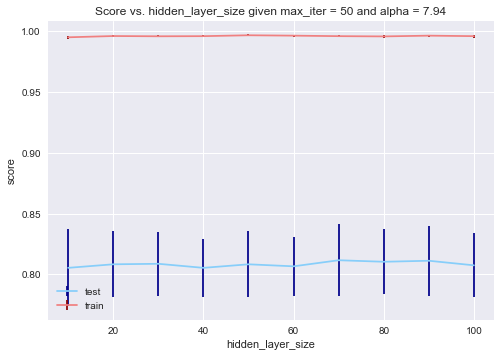

In [48]:
d3 = pd.DataFrame.from_dict(grid3.cv_results_).sort_values(by = ['param_mlp__hidden_layer_sizes'][0])
plt.errorbar([x[0] for x  in d3['param_mlp__hidden_layer_sizes']],d3['mean_test_score'], d3['std_test_score'], ecolor = 'darkblue',color = 'lightskyblue', label = 'test')
plt.errorbar([x[0] for x  in d3['param_mlp__hidden_layer_sizes']],d3['mean_train_score'], d3['std_train_score'], ecolor = 'darkred', color = 'lightcoral', label = 'train')
plt.xlabel('hidden_layer_size')
plt.ylabel('score')
plt.title('Score vs. hidden_layer_size given max_iter = 50 and alpha = 7.94')
plt.legend()

{'mlp__alpha': 7.943282347242816, 'mlp__hidden_layer_sizes': (75,), 'mlp__max_iter': 21.544346900318832, 'mlp__solver': 'lbfgs'}
0.8108333333333334


C:\Users\Zhaohui Zhang\.conda\envs\ml135_env_sp21\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


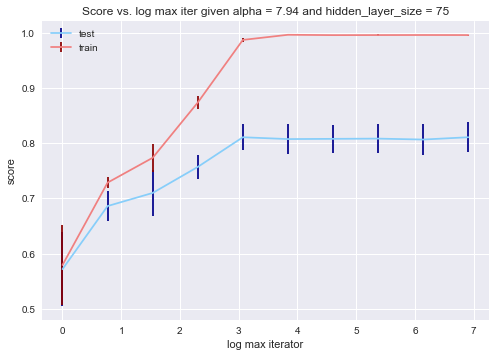

In [51]:
# max iter
param_grid1 = {'mlp__hidden_layer_sizes':[(75,)], 
              'mlp__solver': ['lbfgs'],
              'mlp__alpha': [7.943282347242816],
              'mlp__max_iter': np.logspace(0,3, 10)         
             }
pipeline1 = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('mlp', MLPClassifier())
    ]
)
grid1 = GridSearchCV(pipeline1, param_grid1, return_train_score = True, n_jobs = -1)
grid1.fit(x_train['text_processed'], y_train.values.reshape(-1))
print(grid1.best_params_)
print(grid1.best_score_)
def log_iter(row):
    return math.log(row['param_mlp__max_iter'])
d1 = pd.DataFrame.from_dict(grid1.cv_results_).sort_values(by = ['param_mlp__max_iter'])
d1['log_iter'] = d1.apply(lambda row: log_iter(row), axis = 1)
plt.errorbar(d1['log_iter'],d1['mean_test_score'], d1['std_test_score'], ecolor = 'darkblue',color = 'lightskyblue', label = 'test')
plt.errorbar(d1['log_iter'],d1['mean_train_score'], d1['std_train_score'], ecolor = 'darkred', color = 'lightcoral', label = 'train')
plt.xlabel('log max iterator')
plt.ylabel('score')
plt.title('Score vs. log max iter given alpha = 7.94 and hidden_layer_size = 75')
plt.legend()

{'mlp__alpha': 4.6415888336127775, 'mlp__hidden_layer_sizes': (75,), 'mlp__max_iter': 50, 'mlp__solver': 'lbfgs'}
0.80625


C:\Users\Zhaohui Zhang\.conda\envs\ml135_env_sp21\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


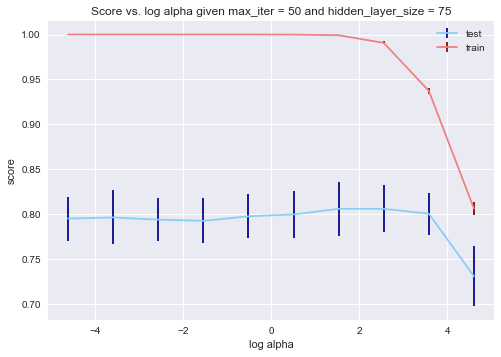

In [50]:
# alpha
param_grid2 = {'mlp__hidden_layer_sizes':[(75,)], 
              'mlp__solver': ['lbfgs'],
              'mlp__alpha': np.logspace(-2, 2, 10),
              'mlp__max_iter': [50]        
             }
pipeline2 = Pipeline(
    [
        ("vect", CountVectorizer()),
        ('mlp', MLPClassifier())
    ]
)
grid2 = GridSearchCV(pipeline2, param_grid2, return_train_score = True, n_jobs = -1)
grid2.fit(x_train['text_processed'], y_train.values.reshape(-1))
print(grid2.best_params_)
print(grid2.best_score_)
def log_alpha(row):
    return math.log(row['param_mlp__alpha'])
d2 = pd.DataFrame.from_dict(grid2.cv_results_).sort_values(by = ['param_mlp__alpha'])
d2['log_alpha'] = d2.apply(lambda row: log_alpha(row), axis = 1)
plt.errorbar(d2['log_alpha'],d2['mean_test_score'], d2['std_test_score'], ecolor = 'darkblue',color = 'lightskyblue', label = 'test')
plt.errorbar(d2['log_alpha'],d2['mean_train_score'], d2['std_train_score'], ecolor = 'darkred', color = 'lightcoral', label = 'train')
plt.xlabel('log alpha')
plt.ylabel('score')
plt.title('Score vs. log alpha given max_iter = 50 and hidden_layer_size = 75')
plt.legend()

array([{'logi__penalty': 'l2', 'logi__max_iter': 154.0, 'logi__C': 1.6681005372000592}],
      dtype=object)

In [ ]:
# param_grid = {'logi__C':np.logspace(-1,1,40), 'logi__penalty':['l2'],'logi__max_iter':np.ceil(np.logspace(1.7,2.7, 50))}

# grid = RandomizedSearchCV(pipeline, param_grid, n_iter = 100, return_train_score = True, n_jobs = -1)
# grid.fit(x_train['text_processed'], y_train.values.reshape(-1))
# print(grid.cv_results_)
# print(grid.best_params_)
# print(grid.best_score_)

{'logi__penalty': 'l2', 'logi__max_iter': 329.0, 'logi__C': 1.0608183551394483}
0.8099999999999999

In [ ]:
# param_grid = { 'logi__penalty':['l2'],'logi__max_iter':np.ceil(np.logspace(1,2.7, 150))}
# pipeline = Pipeline(
#     [
#         ("vect", CountVectorizer()),
#         ('logi', LogisticRegression(C = 1.0608183551394483, n_jobs = -1, solver = 'saga'))
#     ]
# )
# grid = RandomizedSearchCV(pipeline, param_grid, n_iter = 20, return_train_score = True, n_jobs = -1)
# grid.fit(x_train['text_processed'], y_train.values.reshape(-1))
# print(grid.best_params_)
# print(grid.best_score_)

In [ ]:
# def log_iter(row):
#     return math.log(row['param_logi__max_iter'])

In [ ]:
# d = pd.DataFrame.from_dict(grid.cv_results_).sort_values(by = ['param_logi__max_iter'])
# d['log_iter'] = d.apply(lambda row: log_iter(row), axis = 1)

In [ ]:
# plt.errorbar(d['log_iter'],d['mean_test_score'], d['std_test_score'], ecolor = 'darkblue',color = 'lightskyblue', label = 'test')
# plt.errorbar(d['log_iter'],d['mean_train_score'], d['std_train_score'], ecolor = 'darkred', color = 'lightcoral', label = 'train')
# plt.xlabel('log max iterator')
# plt.ylabel('score')
# plt.title('Score vs. log max iter given C = 1.06 and penalty = l2')
# plt.legend()

In [ ]:
# param_grid = {'logi__C':np.logspace(-2,1,100), 'logi__penalty':['l2']}
# pipeline = Pipeline(
#     [
#         ("vect", CountVectorizer()),
#         ('logi', LogisticRegression(n_jobs = -1, solver = 'saga', max_iter = 416))
#     ]
# )
# grid = RandomizedSearchCV(pipeline, param_grid, n_iter = 20, return_train_score = True, n_jobs = -1)
# grid.fit(x_train['text_processed'], y_train.values.reshape(-1))
# print(grid.best_params_)
# print(grid.best_score_)

In [ ]:
# def logC(row):
#     return math.log(row['param_logi__C'])

# d = pd.DataFrame.from_dict(grid.cv_results_).sort_values(by = ['param_logi__C'])
# d['log_c'] = d.apply(lambda row: logC(row), axis = 1)

# plt.errorbar(d['log_c'],d['mean_test_score'], d['std_test_score'], ecolor = 'darkblue', color = 'blue', label = 'test')
# plt.errorbar(d['log_c'],d['mean_train_score'], d['std_train_score'], ecolor = 'darkred', color = 'lightcoral', label = 'train')
# plt.xlabel('log C')
# plt.ylabel('score')
# plt.title('Score vs. log C given max_iter = 416 and penalty = l2')
# plt.legend()